<a href="https://colab.research.google.com/github/hrbolek/simodes/blob/main/notebooks/examplesBcz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokročilé příklady použití simodes

In [34]:
!pip install simodes

In [35]:
import matplotlib.pyplot as plt     # for plots
import pandas as pd                 # for tables
import numpy as np                  # for matrices

from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = (12, 8)

In [36]:
def plot3D(x, y, z, figure = None, showIt=True, **params):
    gph = figure
    if gph is None:
        gph = plt.figure(figsize=(15,8)).gca(projection='3d')

    gph.plot(x, y, z, **params)

    if showIt:
        plt.show()
    return gph

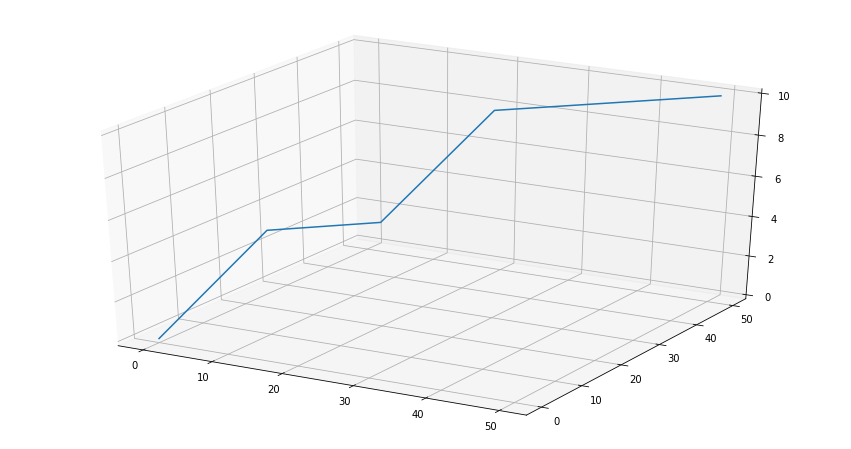

In [37]:
#=================#
# example of use  #
#=================#
x = [0, 10, 20, 30, 40, 50]
y = [0, 10, 20, 30, 40, 50]
z = [0, 5, 5, 10, 10, 10]
plot3D(x, y, z); # yes, semicolon has a meaning :)

In [38]:
def plotData3D(rows, x='x', y='y', z='z', figure=None, showIt=True, **params):
    getx = lambda row: row[x]
    if callable(x):
        getx = x
    gety = lambda row: row[y]
    if callable(y):
        gety = y
    getz = lambda row: row[z]
    if callable(z):
        getz = z
    xx = []
    yy = []
    zz = []
    for row in rows:
        xx.append(getx(row))
        yy.append(gety(row))
        zz.append(getz(row))
    return plot3D(xx, yy, zz, figure, showIt, **params)

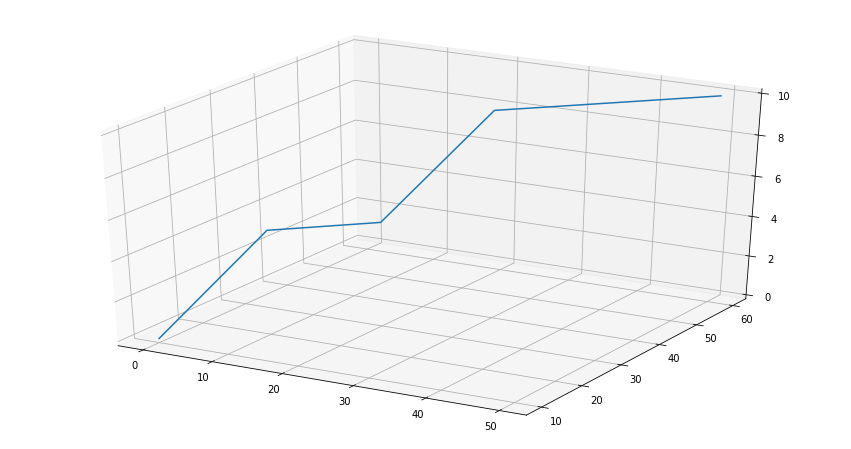

In [39]:
rows = [
    {'x': 0, 'y': 10, 'z': 0},
    {'x': 10, 'y': 20, 'z': 5},
    {'x': 20, 'y': 30, 'z': 5},
    {'x': 30, 'y': 40, 'z': 10},
    {'x': 40, 'y': 50, 'z': 10},
    {'x': 50, 'y': 60, 'z': 10}
]
plotData3D(rows);

## Příklad A

### Importy z knihovny 

In [40]:
import simodes
from simodes import Simulator
from simodes import simpleODESolver
from simodes import createDataSelector
from simodes.models import definePlane
from simodes.models import computeState

### Inicializace simulace

In [41]:
sim = Simulator()
currentState = sim.GetState()
print(currentState)

{'odeModels': {}, 'eventList': {'events': [], 'activeEvent': None}, 'logs': []}


### Příprava modelu

In [42]:
pathForPlane = iter([[1000, 0, 20], [500, 0, 10], [0, 0, 0]])

In [43]:
planeState0 = computeState(1500, 0, 20, 100, 0, 20)

In [44]:
planeModel = definePlane(pathToFlyThrough=pathForPlane)
planeSolver = simpleODESolver(planeModel, 0, planeState0, 1e300, 0.0625)

In [45]:
planeId = sim.AttachODESolver(planeSolver)

### Příprava pro transformaci dat

In [46]:
masterMap = {
    'plane_': lambda item: item[planeId]
}

In [47]:
dataDescriptor = {
    't': lambda item: item['state']['time'],
    'x': lambda item: item['state']['y'][0],
    'y': lambda item: item['state']['y'][1],
    'z': lambda item: item['state']['y'][2]
}

In [48]:
dataSelector = createDataSelector(masterMap, dataDescriptor)

### Cyklus simulace

In [49]:
results = []
for index, currentResult in enumerate(sim.Run()):
    partialResult = dataSelector(currentResult)
    results.append(partialResult)
    if index >= 500:
        break

### Zpracování dat

In [50]:
import pandas as pd

def displayData(data):
    df = pd.DataFrame(data)
    display(df)

In [51]:
displayData(results)

,plane_t,plane_x,plane_y,plane_z
0,0.000000,1500.000000,0.000000,20.0
1,0.000027,1500.001095,0.002449,20.0
2,0.000295,1500.012045,0.026943,20.0
3,0.002978,1500.121613,0.271851,20.0
4,0.029808,1501.224520,2.717675,20.0
...,...,...,...,...
496,30.779808,1477.800341,-59.566658,20.0
497,30.842308,1479.643620,-53.594697,20.0
498,30.904808,1481.561402,-47.646243,20.0
499,30.967308,1483.553388,-41.722225,20.0


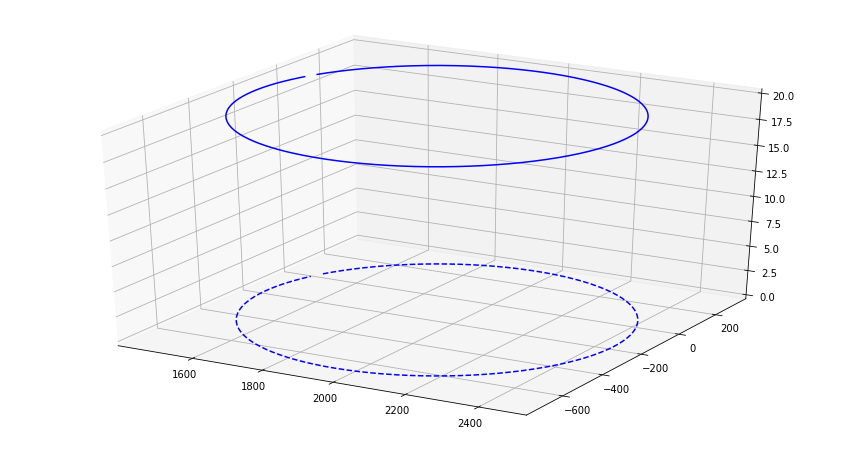

In [52]:
getpx = lambda row: row['plane_x']
getpy = lambda row: row['plane_y']
get0 = lambda row: 0

fig = plotData3D(results, x='plane_x', y='plane_y', z='plane_z', color='blue', showIt=False)
plotData3D(results, x=getpx, y=getpy, z=get0, figure=fig, color='blue', ls='--')
